<a href="https://colab.research.google.com/github/Hassan6678/NLP/blob/main/WA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RNN (Sentimental Analysis for whatsapp Chat)
## (Roman Urdu)

### Import all required libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import tensorflow as tf
import re
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Embedding, Dropout, Bidirectional
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences


## Read Dataset and Show all Unique Class count

In [ ]:
dataset = pd.read_csv('Whatsapp_chat.csv', usecols=[0,1])
#dataset = dataset[dataset['Mode'].isin(['Positive', 'Negative'])]
dataset["Mode"].value_counts()

Neutral     8929
Positive    6013
Negative    5287
Name: Mode, dtype: int64

In [ ]:
data_pos = dataset[dataset['Mode'] == 'Positive'].iloc[:5000]
data_neg = dataset[dataset['Mode'] == 'Negative'].iloc[:5000]
data_neu = dataset[dataset['Mode'] == 'Neutral'].iloc[:5000]

dataset = pd.concat([data_pos,data_neg,data_neu])

dataset = dataset.reset_index(drop=True)

In [ ]:
## Cleaning Process
data=[]
stopwords=['ai', 'ayi', 'hy', 'hai', 'main', 'ki', 'tha', 'koi', 'ko', 'sy', 'woh', 'bhi', 'aur', 'wo', 'yeh', 'rha', 'hota', 'ho', 'ga', 'ka', 'le', 'lye', 'kr', 'kar', 'lye', 'liye', 'hotay', 'waisay', 'gya', 'gaya', 'kch', 'ab', 'thy', 'thay', 'houn', 'hain', 'han', 'to', 'is', 'hi', 'jo', 'kya', 'thi', 'se', 'pe', 'phr', 'wala', 'waisay', 'us', 'na', 'ny', 'hun', 'rha', 'raha', 'ja', 'rahay', 'abi', 'uski', 'ne', 'haan', 'nai', 'sent', 'aj', 'you', 'gai', 'rhy', 'kuch', 'jata', 'aye', 'ya', 'dono', 'hoa', 'aese', 'de', 'wohi', 'jati', 'jb', 'krta', 'lg', 'rahi', 'hui', 'karna', 'krna', 'gi', 'hova', 'yehi', 'jana', 'jye', 'chal', 'mil', 'tu', 'hum', 'par', 'hay', 'kis', 'sb', 'gy', 'dain', 'krny', 'tou']
for i in range(dataset.shape[0]):
    message = (re.sub('[^a-zA-Z]',' ',str(dataset.iloc[:,0].values[i]))).lower().split()
    message = [word for word in message if not word in stopwords]
    message = ' '.join(message)
    data.append(message)

In [ ]:
## The parameter in Keras Tokenizer "number_words" return the ids of the most 5000 frequent words
## By default the tokenizer split on base space " "
tokenizer = Tokenizer(num_words=5000, split=" ")
tokenizer.fit_on_texts(data)
X = tokenizer.texts_to_sequences(data)
print("Total Tokens in Data: ",len(tokenizer.word_index))
X = pad_sequences(X) # padding our text vector so they all have the same length (maximum lenth sub_list in list array)

# maxList = max(X, key = lambda i: len(i))
# maxLength = len(maxList)
maxLength = len(X[0])

Total Tokens in Data:  27471


In [ ]:
model = Sequential()
model.add(Embedding(5000, 256, input_length=X.shape[1]))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(256, return_sequences=True, dropout=0.3, recurrent_dropout=0.2)))
model.add(Bidirectional(LSTM(256, dropout=0.3, recurrent_dropout=0.2)))
model.add(Dense(3, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 188, 256)          1280000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 188, 256)          0         
_________________________________________________________________
bidirectional (Bidirectional (None, 188, 512)          1050624   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 512)               1574912   
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 1539      
Total params: 3,907,075
Trainable params: 3,907,075
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y = pd.get_dummies(dataset['Mode']).values

#[print(dataset['Mode'][i], y[i]) for i in range(12000,1200)]

# Positive [0 0 1]
# Neutral [0 1 0]
# Negative [1 0 0]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
batch_size = 128
epochs = 8

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)

Epoch 1/8
83/83 [==============================] - 548s 7s/step - loss: 0.9983 - accuracy: 0.5023
Epoch 2/8
83/83 [==============================] - 541s 7s/step - loss: 0.7326 - accuracy: 0.6840
Epoch 3/8
83/83 [==============================] - 538s 6s/step - loss: 0.5854 - accuracy: 0.7598
Epoch 4/8
83/83 [==============================] - 534s 6s/step - loss: 0.5035 - accuracy: 0.8002
Epoch 5/8
83/83 [==============================] - 531s 6s/step - loss: 0.4469 - accuracy: 0.8195
Epoch 6/8
83/83 [==============================] - 533s 6s/step - loss: 0.3827 - accuracy: 0.8470
Epoch 7/8
83/83 [==============================] - 534s 6s/step - loss: 0.3422 - accuracy: 0.8649
Epoch 8/8
83/83 [==============================] - 532s 6s/step - loss: 0.2951 - accuracy: 0.8871


In [ ]:
model.save('8_sentiment_analysis.h5')

In [ ]:
predictions = model.predict(X_test)

In [ ]:
[print(dataset['Message'][i], predictions[i], y_test[i]) for i in range(0, 5)]

Sai kha ya her kisi kay bus ki bat nhi hai lakin main ki hal kal bi Aj aur aj bi sirf Aus say bus [0.17270865 0.62243557 0.20485581] [0 1 0]
sahi bt h [0.02946191 0.7973849  0.17315312] [1 0 0]
Kya bt hai, [0.03004375 0.4106755  0.55928075] [0 1 0]
Wah je wah [0.7285259  0.23632066 0.03515355] [0 0 1]
Are wha kaya bat hai [0.99768543 0.0011167  0.00119785] [1 0 0]


[None, None, None, None, None]

In [ ]:
pos_count, neu_count, neg_count = 0, 0, 0
real_pos, real_neu, real_neg = 0, 0, 0
for i, prediction in enumerate(predictions):
    if np.argmax(prediction)==2:
        pos_count += 1
    elif np.argmax(prediction)==1:
        neu_count += 1
    else:
        neg_count += 1
    
    if np.argmax(y_test[i])==2:
        real_pos += 1
    elif np.argmax(y_test[i])==1:    
        real_neu += 1
    else:
        real_neg +=1

print('Positive predictions:', pos_count)
print('Neutral predictions:', neu_count)
print('Negative predictions:', neg_count)
print('Real positive:', real_pos)
print('Real neutral:', real_neu)
print('Real negative:', real_neg)

Positive predictions: 1120
Neutral predictions: 1835
Negative predictions: 1091
Real positive: 1182
Real neutral: 1832
Real negative: 1032


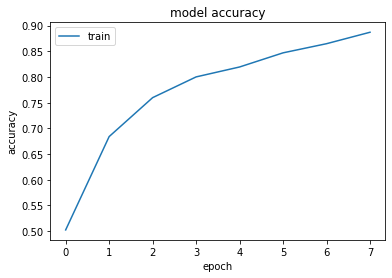

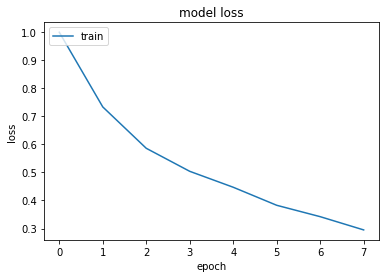

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
#import tensorflow as tf
new_model = load_model('10_sentiment_analysis.h5')

In [ ]:
#/* ~~~~~~~~~~~ Model Predict User Input ~~~~~~~~~~~~ */
new_text = ['Wah je Waah, kya bat han', 'Lanat hy police walo py 😒', 'ye galt bat ha']
seq = tokenizer.texts_to_sequences(new_text)
padded = pad_sequences(seq, maxlen=maxLength)
for case in range(len(seq)):  
  pred = model.predict(padded[[case]])
  labels = ['Negative', 'Neutral', 'Positive']
  print(pred, labels[np.argmax(pred)])

[[0.01385092 0.24622251 0.7399266 ]] Positive
[[9.9993777e-01 3.5023135e-05 2.7193659e-05]] Negative
[[0.95854753 0.0176667  0.02378579]] Negative


In [ ]:
def startsWithDateAndTime(s):
    pattern = '[0-9]{2}/[0-9]{2}/[0-9]{4}' # for New Group settings
    result = re.match(pattern, s)
    if result:
        return True
    return False

In [ ]:
def getDataPoint(line):   
    splitLine = line.split(' - ') 
    dateTime = splitLine[0]
    date, time = dateTime.split(', ') 
    message = ' '.join(splitLine[1:])
    splitMessage = message.split(': ') 
    author = splitMessage[0] 
    message = ' '.join(splitMessage[1:])
    return date, time, author, message

In [ ]:
parsedData = [] # List to keep track of data so it can be used by a Pandas dataframe
### Uploading exported chat file
conversationPath = 'chat_with_Shakir.txt' # chat file
with open(conversationPath, encoding="utf-8") as fp:
    ### Skipping first line of the file because contains information related to something about end-to-end encryption
    fp.readline()
    
    messageBuffer = [] 
    date, time, author = None, None, None
    while True:
        line = fp.readline()
        #print(line)
        if not line: 
            break
        line = line.strip() 
        if startsWithDateAndTime(line):
            #print('..........')
            if len(messageBuffer) > 0:
                parsedData.append([date, time, author, ' '.join(messageBuffer)]) 
            messageBuffer.clear() 
            date, time, author, message = getDataPoint(line) 
            messageBuffer.append(message) 
        else:
            messageBuffer.append(line)
    
print(len(parsedData))

SHChat = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Author', 'Message']) # Initialising a pandas Dataframe.
SHChat["Date"] = pd.to_datetime(SHChat["Date"])

339


In [ ]:
# Data Cleaning process 
### Counting number of letters in each message
SHChat['Words'] = SHChat['Message'].apply(lambda s : len(s.split(' ')))
SHChat = SHChat[SHChat['Message'] != '<Media omitted>']
SHChat = SHChat[SHChat['Words'] != 1]


In [ ]:
Hassan_Chat = SHChat[SHChat['Author'] == 'HR']
Shakir_Chat = SHChat[SHChat['Author'] == 'Shakir MS_27']

In [ ]:
Hassan_msg = Hassan_Chat['Message'].to_list()
Shakir_msg = Shakir_Chat['Message'].to_list()
def pred_arr(msg):
  seq = tokenizer.texts_to_sequences(msg)
  padded = pad_sequences(seq, maxlen=maxLength)

  pos_count, neu_count, neg_count = 0, 0, 0
  for case in range(len(seq)):
    #print(Hassan_message[case])
    pred = model.predict(padded[[case]])
    labels = ['Negative', 'Neutral', 'Positive']
    #print(pred, labels[np.argmax(pred)])
    if np.argmax(pred)==2:
        pos_count += 1
    elif np.argmax(pred)==1:
        neu_count += 1
    else:
        neg_count += 1

  print('Positive predictions:', pos_count)
  print('Neutral predictions:', neu_count)
  print('Negative predictions:', neg_count)

  p = [neg_count, neu_count, pos_count]
  return p

data1 = np.array(pred_arr(Hassan_msg))
data2 = np.array(pred_arr(Shakir_msg))

Positive predictions: 16
Neutral predictions: 58
Negative predictions: 66
Positive predictions: 20
Neutral predictions: 48
Negative predictions: 45


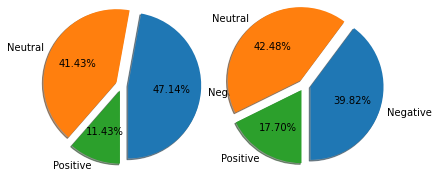

In [ ]:
myexplode = [0.1, 0.1, 0.1]

# create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.pie(data1, # Values
        labels = labels, # Labels for each sections
        explode = myexplode, # To slice the perticuler section
        autopct = "%0.2f%%", # Show data in persentage for with 2 decimal point
        shadow = True, # Showing shadow of pie chart
        radius = 1.2, # Radius to increase or decrease the size of pie chart 
        startangle = 270, # Start angle of first section
        )
ax2.pie(data2, # Values
        labels = labels, # Labels for each sections
        explode = myexplode, # To slice the perticuler section
        autopct = "%0.2f%%", # Show data in persentage for with 2 decimal point
        shadow = True, # Showing shadow of pie chart
        radius = 1.2, # Radius to increase or decrease the size of pie chart 
        startangle = 270, # Start angle of first section
        )
plt.show()